In [54]:
#basic libraries for data storing and plotting 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools


#data preprocessing
import re
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#feature extraction and splitting of data 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

#models import
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier


#evaluation scores import
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score

#to save and load the model 
from joblib import dump, load
import joblib


#nltk corpus 
nltk.download('stopwords')
nltk.download('wordnet')


#ignore the warnings
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [30]:
file = 'Suicide_Ideation_Dataset(Twitter-based).csv'
df = pd.read_csv(file)

In [31]:
df.head()

,Tweet,Suicide
0,making some lunch,Not Suicide post
1,@Alexia You want his money.,Not Suicide post
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post


In [32]:
df.describe()

,Tweet,Suicide
count,1785,1787
unique,1777,2
top,Became as hot as the persistent days resting h...,Not Suicide post
freq,2,1127


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1787 entries, 0 to 1786
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Tweet    1785 non-null   object
 1   Suicide  1787 non-null   object
dtypes: object(2)
memory usage: 28.0+ KB


In [34]:
df.isnull().sum()

Tweet      2
Suicide    0
dtype: int64

In [35]:
df = df.dropna()

In [36]:
df.isnull().sum()

Tweet      0
Suicide    0
dtype: int64

In [37]:
def plot_sns_countplot(df, column_name):
    sns.set(style="whitegrid")
    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x=column_name, palette='pastel', edgecolor=".6", order=df[column_name].value_counts().index)
    
    plt.title(f'Categorical Countplot - {column_name}', fontsize=16)
    plt.xlabel(column_name, fontsize=14)
    plt.ylabel('Count', fontsize=14)
    plt.xticks(rotation=45, ha='right')
    plt.show()

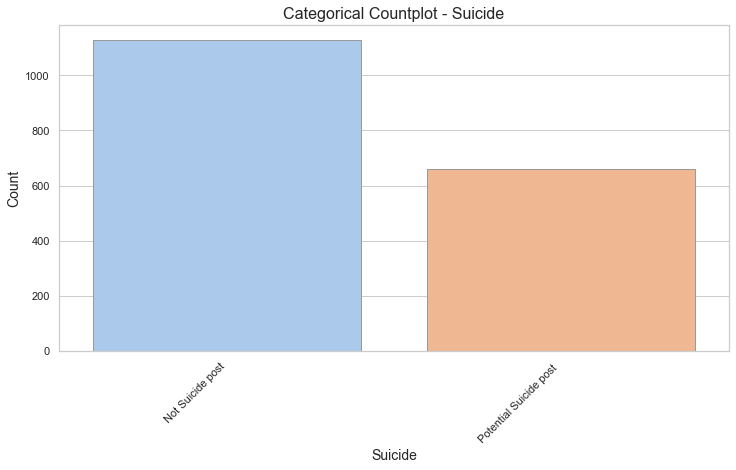

In [38]:
plot_sns_countplot(df, 'Suicide')

In [39]:
def process_text_column(df, column_name='Tweet'):
    # processing regular expressions
    
    #tokenization
    # cleanrnig . . . . . regular
    # lemmatize
    # stemming 
    # vectorization
    def preprocessor(text):
        #removing anything after @ as its just the username
        text = re.sub(r'@[^\s]+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)  # sh12342aswat = shaswat
        text = re.sub(r'\b(?:the|and|is|it|of|in|to|for|with|on|at|by|this|an|a)\b', ' ', text, flags=re.IGNORECASE)
        return text

    #  tokenizer by splitting sentences 
    def tokenizer(text):
        # i am happy
        # ['i', 'am', 'happy']
        return text.split()

    # lemmatize with word net lemmatizer
    def lemmatizer(tokens):
        # play played plays = play ---->
        lemmatizer = WordNetLemmatizer()
        return [lemmatizer.lemmatize(token) for token in tokens]

    #  Porter Stemmer to stem the tokens 
    def porter_stemmer(tokens):
        # happiness =  happy
        stemmer = PorterStemmer()
        return [stemmer.stem(token) for token in tokens]

    # tfidf vectorizer
    def vectorizer(texts):
        # happy = [ 0.5 0.8 0.8 0.01                         ]
    
        tfidf_vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))
        X_tfidf = tfidf_vectorizer.fit_transform(texts).toarray()
        #onehot_encoder = OneHotEncoder()
        #X_onehot = onehot_encoder.fit_transform(X_tfidf).toarray()
        #dump(onehot_encoder, 'onehot_encoder.joblib')
        dump(tfidf_vectorizer, 'tfidf_vectorizer.joblib')
        #display(X_onehot)
        return X_tfidf


    # Apply preprocessing
    df['Processed_Text'] = df[column_name].apply(preprocessor)

    # Tokenize
    df['Tokenized_Text'] = df['Processed_Text'].apply(tokenizer)

    # Lemmatize
    df['Lemmatized_Text'] = df['Tokenized_Text'].apply(lemmatizer)

    # Porter Stemming
    df['Stemmed_Text'] = df['Tokenized_Text'].apply(porter_stemmer)

    # Vectorize
    vectorized_documents = vectorizer(df['Processed_Text'])
    df['Vectorized_Text'] = list(vectorized_documents)

    return df

# Process the 'Tweet' column
df = process_text_column(df, column_name='Tweet')



# Display the processed DataFrame
display(df)



,Tweet,Suicide,Processed_Text,Tokenized_Text,Lemmatized_Text,Stemmed_Text,Vectorized_Text
0,making some lunch,Not Suicide post,making some lunch,"[making, some, lunch]","[making, some, lunch]","[make, some, lunch]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1,@Alexia You want his money.,Not Suicide post,You want his money,"[You, want, his, money]","[You, want, his, money]","[you, want, hi, money]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,that crap took me forever put together im g...,"[that, crap, took, me, forever, put, together,...","[that, crap, took, me, forever, put, together,...","[that, crap, took, me, forev, put, togeth, im,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,kiwitweets Hey Jer Since when did you start t...,"[kiwitweets, Hey, Jer, Since, when, did, you, ...","[kiwitweets, Hey, Jer, Since, when, did, you, ...","[kiwitweet, hey, jer, sinc, when, did, you, st...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,Trying out quotDelicious Library quot mixed ...,"[Trying, out, quotDelicious, Library, quot, mi...","[Trying, out, quotDelicious, Library, quot, mi...","[tri, out, quotdelici, librari, quot, mix, res...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
...,...,...,...,...,...,...,...
1782,i have forgotten how much i love my Nokia N95-1,Not Suicide post,i have forgotten how much i love my Nokia N,"[i, have, forgotten, how, much, i, love, my, N...","[i, have, forgotten, how, much, i, love, my, N...","[i, have, forgotten, how, much, i, love, my, n...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1783,Starting my day out with a positive attitude! ...,Not Suicide post,Starting my day out positive attitude be...,"[Starting, my, day, out, positive, attitude, b...","[Starting, my, day, out, positive, attitude, b...","[start, my, day, out, posit, attitud, be, grea...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1784,"@belledame222 Hey, it's 5 am...give a girl som...",Not Suicide post,Hey its amgive girl some credit trying,"[Hey, its, amgive, girl, some, credit, trying]","[Hey, it, amgive, girl, some, credit, trying]","[hey, it, amgiv, girl, some, credit, tri]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
1785,2 drunken besties stumble into my room and we ...,Not Suicide post,drunken besties stumble into my room we run...,"[drunken, besties, stumble, into, my, room, we...","[drunken, besties, stumble, into, my, room, we...","[drunken, besti, stumbl, into, my, room, we, r...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [40]:
#for Suicide column lets encode and map to 0 and 1 
le = LabelEncoder()
df['target'] = le.fit_transform(df['Suicide'])


In [41]:
df.head()

,Tweet,Suicide,Processed_Text,Tokenized_Text,Lemmatized_Text,Stemmed_Text,Vectorized_Text,target
0,making some lunch,Not Suicide post,making some lunch,"[making, some, lunch]","[making, some, lunch]","[make, some, lunch]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
1,@Alexia You want his money.,Not Suicide post,You want his money,"[You, want, his, money]","[You, want, his, money]","[you, want, hi, money]","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
2,@dizzyhrvy that crap took me forever to put to...,Potential Suicide post,that crap took me forever put together im g...,"[that, crap, took, me, forever, put, together,...","[that, crap, took, me, forever, put, together,...","[that, crap, took, me, forev, put, togeth, im,...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",1
3,@jnaylor #kiwitweets Hey Jer! Since when did y...,Not Suicide post,kiwitweets Hey Jer Since when did you start t...,"[kiwitweets, Hey, Jer, Since, when, did, you, ...","[kiwitweets, Hey, Jer, Since, when, did, you, ...","[kiwitweet, hey, jer, sinc, when, did, you, st...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0
4,Trying out &quot;Delicious Library 2&quot; wit...,Not Suicide post,Trying out quotDelicious Library quot mixed ...,"[Trying, out, quotDelicious, Library, quot, mi...","[Trying, out, quotDelicious, Library, quot, mi...","[tri, out, quotdelici, librari, quot, mix, res...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0


In [42]:
X = np.vstack(df['Vectorized_Text'].to_numpy())
X_train, X_test, y_train, y_test = train_test_split(X, df['target'], test_size = 0.2, random_state = 0)
display(X_train)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [155]:
def plot_confusion_matrix(y_true, y_pred, classes, name):
    """
    Plot a confusion matrix.

    Parameters:
    - y_true: True labels
    - y_pred: Predicted labels
    - classes: Class names (list)
    """
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=classes, yticklabels=classes)
    plt.title(f'Confusion Matrix of {name}')
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    plt.show()


In [165]:
def rf_clf(X_train, X_test, y_train , y_test):

    model =  RandomForestClassifier(n_estimators=100, random_state=42)

    model.fit(X_train, y_train)

    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    cm = confusion_matrix(y_test, y_pred)

    plot_confusion_matrix(y_test, y_pred,['Not Suicidal', 'Suicidal'], 'Random Forest')


    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    
    return model

In [166]:
def svm_clf(X_train, X_test, y_train, y_test):
    model = SVC(kernel='linear', random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred,['Not Suicidal', 'Suicidal'], 'SVM')

    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    
    return model


In [167]:
def dt_clf(X_train, X_test, y_train, y_test):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred,['Not Suicidal', 'Suicidal'], 'Decision Tree')

    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    
    return model


In [168]:
def knn_clf(X_train, X_test, y_train, y_test):
    model = KNeighborsClassifier(n_neighbors=5)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy}")
    
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(y_test, y_pred,['Not Suicidal', 'Suicidal'], 'KNN')

    report = classification_report(y_test, y_pred)
    print("\nClassification Report:")
    print(report)
    
    return model

Accuracy: 0.9159663865546218


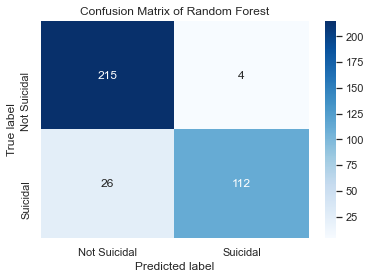


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       219
           1       0.97      0.81      0.88       138

    accuracy                           0.92       357
   macro avg       0.93      0.90      0.91       357
weighted avg       0.92      0.92      0.91       357



In [169]:
random_forest_model = rf_clf(X_train, X_test, y_train, y_test)

Accuracy: 0.8823529411764706


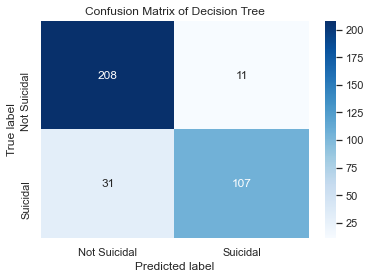


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       219
           1       0.91      0.78      0.84       138

    accuracy                           0.88       357
   macro avg       0.89      0.86      0.87       357
weighted avg       0.88      0.88      0.88       357



In [170]:
decision_tree_model = dt_clf(X_train, X_test, y_train, y_test)

Accuracy: 0.803921568627451


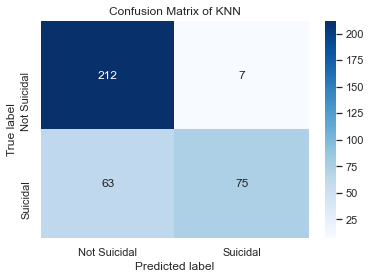


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.97      0.86       219
           1       0.91      0.54      0.68       138

    accuracy                           0.80       357
   macro avg       0.84      0.76      0.77       357
weighted avg       0.83      0.80      0.79       357



In [171]:
knn_model = knn_clf(X_train, X_test, y_train, y_test)

Accuracy: 0.9103641456582633


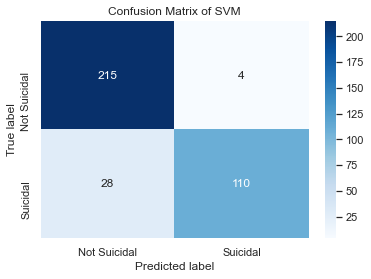


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.98      0.93       219
           1       0.96      0.80      0.87       138

    accuracy                           0.91       357
   macro avg       0.92      0.89      0.90       357
weighted avg       0.92      0.91      0.91       357



In [172]:
svm_model = svm_clf(X_train, X_test, y_train, y_test)

In [177]:
new_sentence = "i want to die"

def preprocess_text(text, tfidf_vectorizer):
    def preprocessor(text):
        text = re.sub(r'@[^\s]+', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = re.sub(r'\b(?:the|and|is|it|of|in|to|for|with|on|at|by|this|an|a)\b', ' ', text, flags=re.IGNORECASE)
        return text

    processed_text = preprocessor(text)

    #tfidf
    X_tfidf = tfidf_vectorizer.transform([processed_text]).toarray()

    return X_tfidf

In [ ]:
models = {
    "Random Forest Classifier" : random_forest_model,
    "Decision Tree Classifier" : decision_tree_model,
    "KNN Classifier" : knn_model,
    "SVM" : svm_model
}

while True:
    new_sentence = str(input("Tweet: "))
    
    if new_sentence == "exit":
        break
            
    vectorized_sentence = preprocess_text(new_sentence, tfidf_vectorizer)

    for item in models:
        # Make predictions
        print(" ")
        predicted_label = models[item].predict(vectorized_sentence)
        print("model: ", item)
        print(f"Predicted Label: {predicted_label}")

        if predicted_label[0] == 1:
            print("potential suicidal post")
        else:
            print("not suicidal post ")
        

Tweet: I want to die
 
model:  Random Forest Classifier
Predicted Label: [1]
potential suicidal post
 
model:  Decision Tree Classifier
Predicted Label: [1]
potential suicidal post
 
model:  KNN Classifier
Predicted Label: [1]
potential suicidal post
 
model:  SVM
Predicted Label: [1]
potential suicidal post
Tweet: this life is unbearable but i should be stronger 
 
model:  Random Forest Classifier
Predicted Label: [0]
not suicidal post 
 
model:  Decision Tree Classifier
Predicted Label: [0]
not suicidal post 
 
model:  KNN Classifier
Predicted Label: [1]
potential suicidal post
 
model:  SVM
Predicted Label: [0]
not suicidal post 
